<h1 style='font-family: Trebuchet MS; color:#34495E'> DataSet <a id='0'></a></h1>
<p style='font-family:Trebuchet MS'>The dataset can be found on <a href='https://www.kaggle.com/anthonypino/melbourne-housing-market'> Kaggle </a>.

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Libraries <a id='0.1'></a></h3>

In [1]:
import pandas as pd

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Data <a id='0.2'></a></h3>

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

<h1 style='font-family:Trebuchet MS; color:#34495E'> Table of Contents </h1>

<div class='alert alert-block alert-info' style='font-family:Trebuchet MS; color:#34495E'>

1.[DataSet](#0)<br>
2.[Time Series](#1) <br>
3.[FbProphet](#2) <br>
4. [Model Development ](#3)<br>
5. [Model Evaluation](#4)<br>

        
</div>

<h1 style='font-family: Trebuchet MS; color:#34495E'> Time Series <a id='1'></a></h1>

In [3]:
df = df[['Date', 'Price']]

In [4]:
df = df.dropna()
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df = df.resample('MS').count()

<h3 style='font-family: Trebuchet MS; color:#34495E'> Visualisation <a id='1.1'></a></h1>

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Libraries <a id='0.1'></a></h3>

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,8]

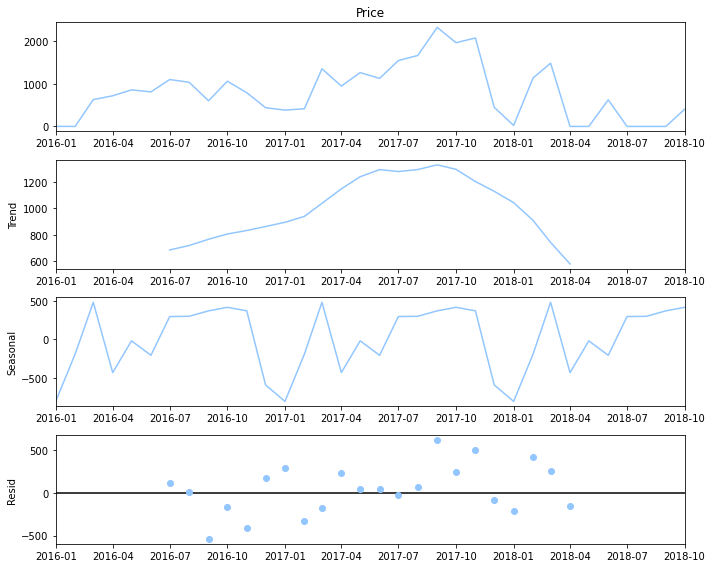

In [6]:
decomposition = sm.tsa.seasonal_decompose(df['Price'])
decomposition.plot()
plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>1. Trend: It infers that the House Price is at peak in the year 2017 (about June 2017 to October 2017).<br>
    2. Seasonal: It seems like the house sale at the beginning of every year (January) is very low then it grew continue through March and went down in April and finally went up after April and reach the peak in October. <br>
    3. Residual: There are some residual in every month. 

<h1 style='font-family: Trebuchet MS; color:#34495E'> FbProphet <a id='1'></a></h1>

<h3 style='font-family: Trebuchet MS; color:#34495E'> Data Preparation <a id='1.1'></a></h1>

In [7]:
df = df.reset_index()
df.columns = ['ds','y']

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Libraries <a id='0.1'></a></h3>

In [8]:
from fbprophet import Prophet

<h4 style='font-family: Trebuchet MS; color:#34495E'> Model Fitting <a id='0.1'></a></h3>

In [9]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<h4 style='font-family: Trebuchet MS; color:#34495E'> In-Sample Forecast<a id='0.1'></a></h3>

In [10]:
future = list()
for i in range(1, 11):
    date = '2018-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [11]:
forecast = prophet.predict(future)

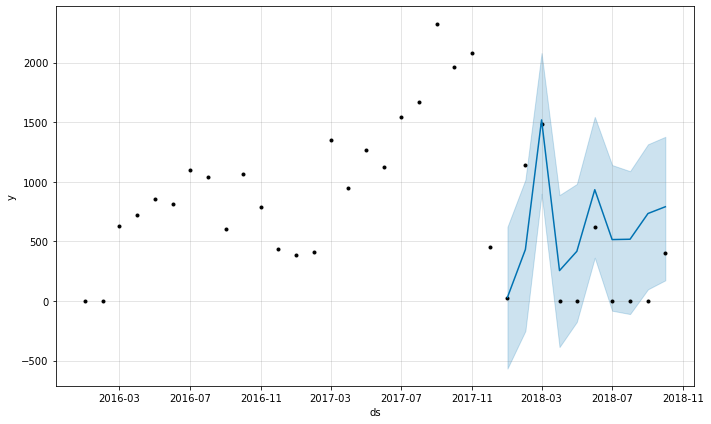

In [12]:
prophet.plot(forecast)
plt.show()

<h5 style='font-family: Trebuchet MS; color:#34495E'> Evaluation<a id='0.1'></a></h3>

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [14]:
y_train = df[df['ds']>'2017-12-01']['y']

In [15]:
mse = mean_squared_error(y_train, forecast['yhat'])
mae = mean_absolute_error(y_train, forecast['yhat'])
rmse = sqrt(mse)

In [16]:
print('Mean Squared Error: {:2.2f}, Mean Absolute Error: {:2.2f}, Root Mean Squared Error: {:2.2f}'.format(mse, mae, rmse))

Mean Squared Error: 205422.23, Mean Absolute Error: 388.14, Root Mean Squared Error: 453.24


<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>1. The prediction from January - March 2018 is a good match for the real observations, especially when the bounds are taken into account. <br>
    2.Forecast of April, May, July, August, September performed badly as the model did not expected a 0 count in these few months. <br>
    3. Considering all the errors given from this model, we could say that the model performed not that good (RMSE/MAE of almost 300-500 while the actual range is only about 0-1500); though the large errors most probably came from those months without any trades. However, it does captured the seasonality, the bounds in June and October. 

<h4 style='font-family: Trebuchet MS; color:#34495E'> Out-of-Sample Forecast<a id='0.1'></a></h3>

In [17]:
future = list()
for i in range(1, 13):
    date = '2019-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [18]:
forecast = prophet.predict(future)

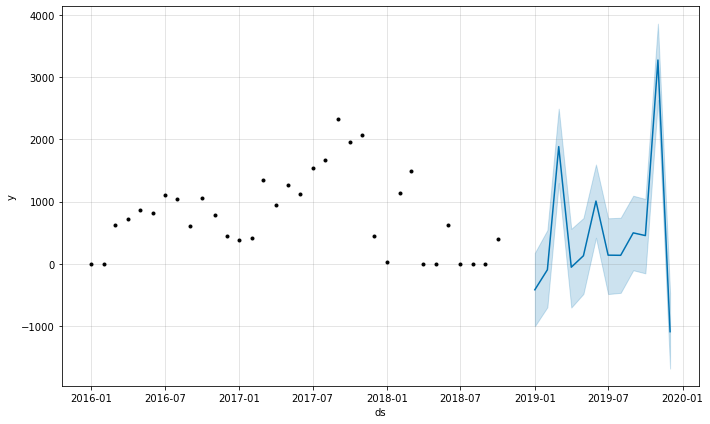

In [19]:
prophet.plot(forecast)
plt.show()

<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'>This model could be better as it predicted the count of house sale is a negative number in January 2019. However, I believed it has captured the seasonality and the trend. <br>
    Seasonality: Low in the beginning (January) and spiked in March as previous year, drop gradually in April and a small spike in June went down, and lastly spiked in November. <br>
    Trend: Uptrend in (2016-2017) and Downtrend in (Dec/2017 - 2018). 

<h4 style='font-family: Trebuchet MS; color:#34495E'> Conclusion: <a id='2.1'></a></h4>
<p style='font-family: Trebuchet MS'> To conclude, FbProphet did not perform well in those months without any trades. Other than those months, especially January, February and March 2018, it is a good match for the real observations, especially when the bounds are taken into account. But it did captured all the seasonality and trend in the house sold count.